In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("sweetspot_UT_Austin.csv")

# Convert columns to numeric where possible
def convert_to_numeric(column):
    try:
        return pd.to_numeric(column, errors='coerce')
    except:
        return column

df = df.apply(convert_to_numeric)

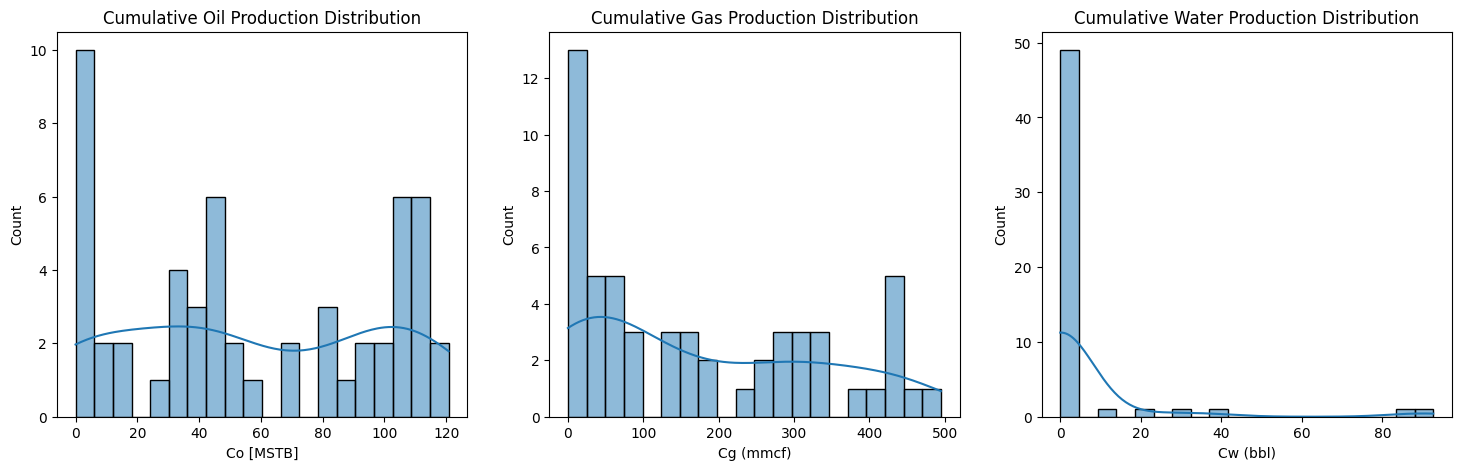

In [7]:
# Distribution of Oil, Gas, and Water Production
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Co [MSTB]'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Cumulative Oil Production Distribution")
sns.histplot(df['Cg (mmcf)'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Cumulative Gas Production Distribution")
sns.histplot(df['Cw (bbl)'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Cumulative Water Production Distribution")
plt.show()

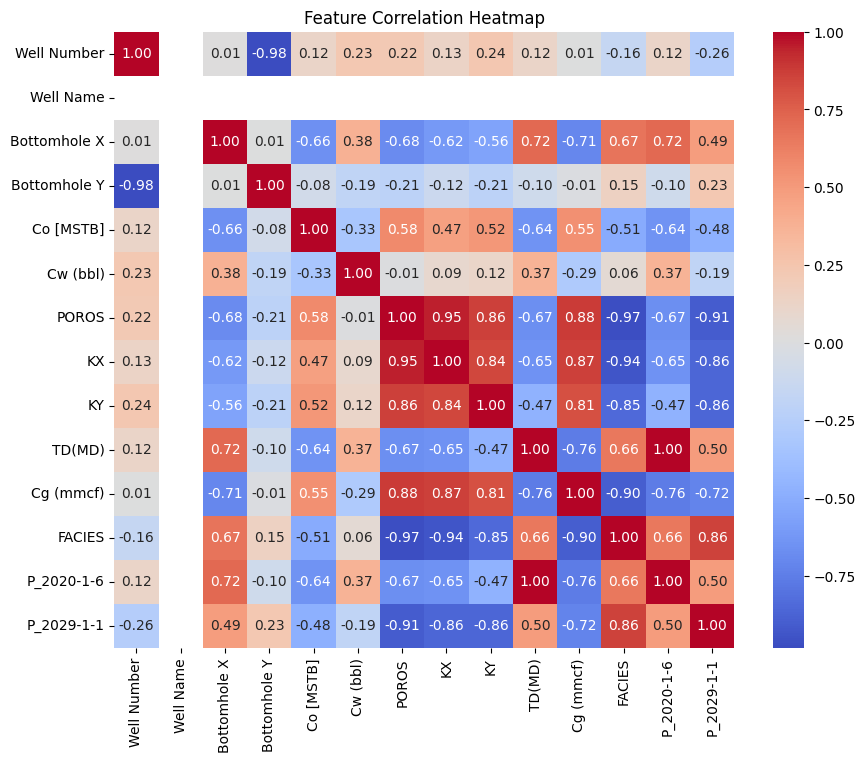

In [8]:
# Correlation Heatmap (Removing Non-Numeric Columns)
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

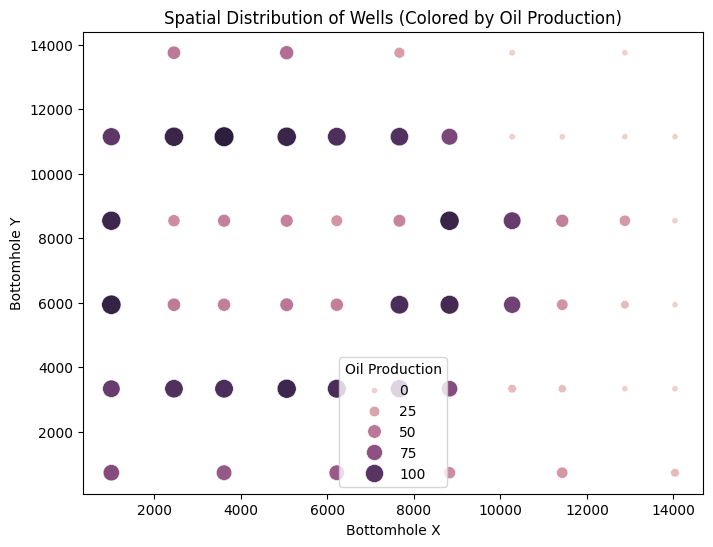

In [9]:
# Spatial Distribution of Wells
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Bottomhole X'], y=df['Bottomhole Y'], hue=df['Co [MSTB]'], size=df['Co [MSTB]'], sizes=(20, 200))
plt.xlabel("Bottomhole X")
plt.ylabel("Bottomhole Y")
plt.title("Spatial Distribution of Wells (Colored by Oil Production)")
plt.legend(title="Oil Production")
plt.show()

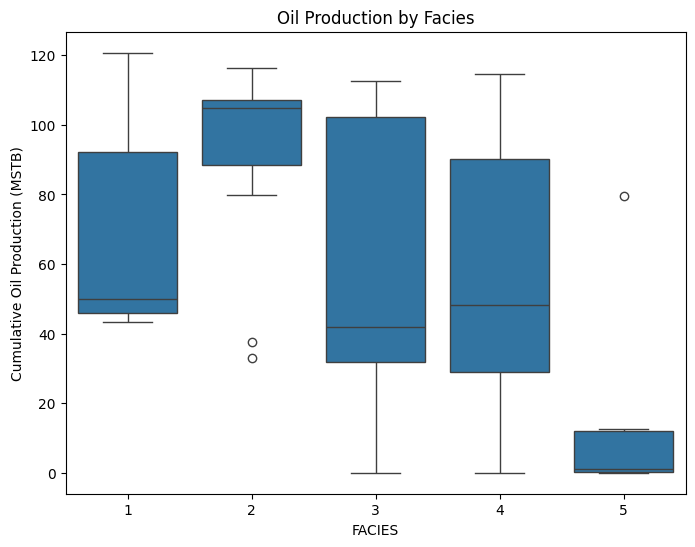

In [10]:
# Facies vs. Oil Production
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['FACIES'], y=df['Co [MSTB]'])
plt.xlabel("FACIES")
plt.ylabel("Cumulative Oil Production (MSTB)")
plt.title("Oil Production by Facies")
plt.show()

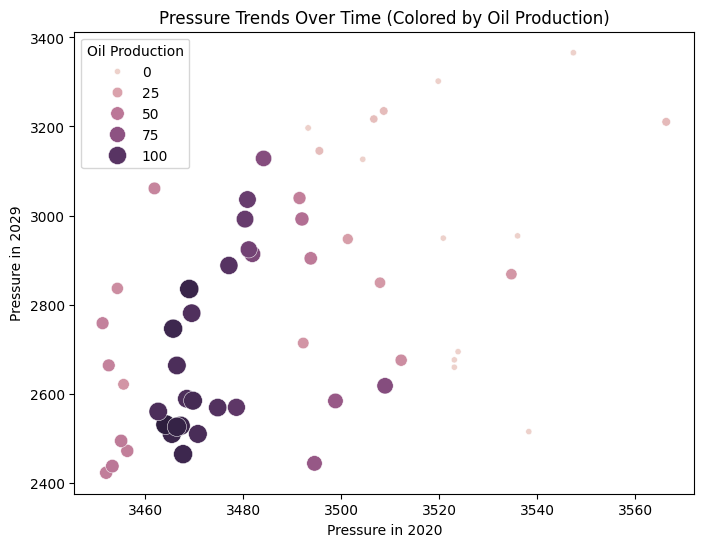

In [11]:
# Pressure Trends Over Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['P_2020-1-6'], y=df['P_2029-1-1'], hue=df['Co [MSTB]'], size=df['Co [MSTB]'], sizes=(20, 200))
plt.xlabel("Pressure in 2020")
plt.ylabel("Pressure in 2029")
plt.title("Pressure Trends Over Time (Colored by Oil Production)")
plt.legend(title="Oil Production")
plt.show()